# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [3]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [4]:
# !pip freeze > requirements.txt

/bin/bash: requirements.txt: Operation not supported


In [5]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

     |████████████████████████████████| 133kB 6.1MB/s 
     |████████████████████████████████| 6.3MB 8.4MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 163kB 58.1MB/s 
     |████████████████████████████████| 3.0MB 64.4MB/s 
     |████████████████████████████████| 1.1MB 66.3MB/s 
     |████████████████████████████████| 1.3MB 58.2MB/s 
     |████████████████████████████████| 122kB 53.0MB/s 
     |████████████████████████████████| 6.9MB 53.5MB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 849kB 63.2MB/s 
  Created wheel for gTTS-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=90d5db9fa117867dfac22f9eef7f917277dfbc208a07c492c63ae940e60e9368
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
  Created wheel for ppscore: filename=ppscore-0.0.3-py2.py3-none-any.whl size=10303 sha256=2d3c8a089f0004d38efcd0c5f2b9ebac89

In [ ]:
from P4_functions import *

Importation of modules and packages. 

In [ ]:
import io
# import re
import simplejson as json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'
# from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import ppscore as pps

import dill

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import category_encoders as ce

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import *
from sklearn import metrics


from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import category_encoders as ce

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression, ElasticNet, huber, ransac, theil_sen
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [ ]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

To play audio text-to-speech during execution.

In [ ]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [ ]:
plot_enabled = False
save_enabled = False

In [ ]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [ ]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv  and .jsonfiles in notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv  and .jsonfiles in notebook OK


In [ ]:
speak('Dataset successfully imported')

### 0.2 Overview

Printing total nb and percentage of null

In [ ]:
print_null_pct(df)

nb of null:  26512 
pct of null:  16.9
nb of null:  19952 
pct of null:  12.8


In [ ]:
plot_export_missing(df, df.columns, 'missing_vals_cleaned.png',
                    'Overview of missing data in\n merged, filtered, cleaned dataset',
                    shorten_label=True)

In [ ]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

#### SiteEnergyUse(kBtu)

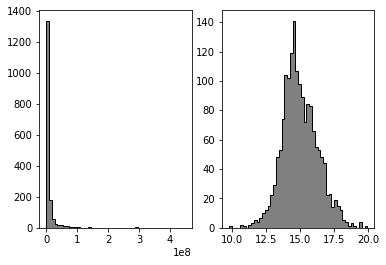

In [ ]:
df['SiteEnergyUse(kBtu)_log'] = np.log(df['SiteEnergyUse(kBtu)'])

fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUse(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].hist(df['SiteEnergyUse(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);

TotalGHGEmissions

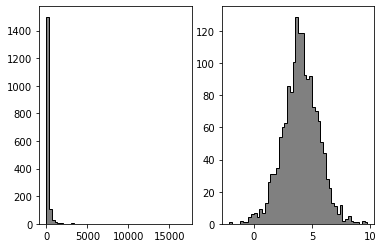

In [ ]:
df['TotalGHGEmissions_log'] = np.log(df['TotalGHGEmissions'])

fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);

### 1.2 First eatures selection

__Quantitative data__

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'


__Categorical data__

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [ ]:
prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
                              ['PropertyGFATotal', 'PropertyGFABuilding(s)']]
prop_Q_cols_sel

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'BuildingAge',
 'MeanGFAperFloor',
 'ParkingGFARatio',
 'NbYearsCertified']

In [ ]:
prop_C_cols_sel = [c for c in prop_C_cols if c not in ['PrimaryPropertyType']]
prop_C_cols_sel

['BuildingType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'CertifiedPreviousYear',
 'EnergyProfile',
 'MainEnergy']

### 1.3 Splitting training and testing set 

In [ ]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y1 = df['SiteEnergyUse(kBtu)']
df_y1_log = df['SiteEnergyUse(kBtu)_log']
# df_y2 = df['TotalGHGEmissions']

In [ ]:
X_tr, X_te, y1_tr, y1_te = train_test_split(df_X, df_y1,
                                            train_size=0.8, shuffle=True,
                                            stratify=df['PrimaryPropertyType'])

Training and testing set for linear regression avoiding colinearity

In [ ]:
X_tr_sel = X_tr[prop_Q_cols_sel+prop_C_cols_sel]
X_te_sel = X_te[prop_Q_cols_sel+prop_C_cols_sel]

### 1.4 Feature transformations

__Quantitative data__

Standardizing the quantitative values.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal. We'll choose between:
- Ordinal Encoding (boolean): 'CertifiedPreviousYear'(2)
- One-Hot Encoding (low cardinality):
'BuildingType'(5), 'MainEnergy'(3), 'EnergyProfile'(8)
- Binary or Hashing or Leave-One-Out target encoding (high cardinality):
('LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

In [ ]:
# full dataset
column_trans = make_column_transformer(
    (ce.OneHotEncoder(drop_invariant=True), ['BuildingType', 'MainEnergy','EnergyProfile']),
    (ce.OrdinalEncoder(drop_invariant=True), ['CertifiedPreviousYear']),
    (ce.HashingEncoder(n_components=8, drop_invariant=True),
     ['LargestPropertyUseType', 'SecondLargestPropertyUseType',
      'ThirdLargestPropertyUseType', 'PrimaryPropertyType']),
     remainder=StandardScaler())

# dataset to avoid colinearity
column_trans_sel = make_column_transformer(
    (ce.OneHotEncoder(drop_invariant=True), ['BuildingType', 'MainEnergy','EnergyProfile']),
    (ce.OrdinalEncoder(drop_invariant=True), ['CertifiedPreviousYear']),
    (ce.HashingEncoder(n_components=8, drop_invariant=True),
     ['LargestPropertyUseType', 'SecondLargestPropertyUseType',
      'ThirdLargestPropertyUseType']),
     remainder=StandardScaler())

## 2 First model selection

In [ ]:
stop

NameError: ignored

In [ ]:
df_res = pd.DataFrame(dtype = 'object')

In [ ]:
print("data missing in colinear" , set(X_tr.columns) - set(X_tr_sel.columns))

#### Linear regression baseline

In [ ]:
reg = LinearRegression()
name_reg = 'LinearRegression'

pipe = make_pipeline(column_trans_sel, reg)
pipe.fit(X_tr_sel,y1_tr)

y_pr = pipe.predict(X_te_sel)
res = scores_reg(name_reg, y1_te, y_pr).astype('object')
res_cv = cv_scores_reg(name_reg, pipe, X_te_sel, y1_te).astype('object')

df_res[res.name] = pd.concat([res.astype('object'), res_cv.astype('object')]) 
df_res

#### Linear Regressions

In [ ]:
'''MODELES REGRESSEURS LINEAIRES DANS SKLEARN : 
Lars, LassoLars, ARDRegression, BayesianRidge, SGDRegressor, HuberRegressor,
RANSACRegressor, TheilSenRegressor, TweedieRegressor, GammaRegressor,
PoissonRegressor, PassiveAggressiveRegressor'''

from sklearn.linear_model import *

In [ ]:
# sans optimisation

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet', 'Lars', 'LassoLars',
                          'ARDRegression', 'BayesianRidge', 'SGDRegressor',
                          'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor',
                          'PassiveAggressiveRegressor',
                          'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor'],
                         [Ridge(), Lasso(), ElasticNet(), Lars(), LassoLars(),
                          ARDRegression(), BayesianRidge(), SGDRegressor(),
                          HuberRegressor(), RANSACRegressor(), TheilSenRegressor(),
                          PassiveAggressiveRegressor(),
                          PoissonRegressor(), TweedieRegressor(), GammaRegressor()]):

    pipe = make_pipeline(column_trans, reg)
    pipe.fit(X_tr,y1_tr)

    y_pr = pipe.predict(X_te)
    res = scores_reg(name_reg, y1_te, y_pr).astype('object')
    res_cv = cv_scores_reg(name_reg, pipe, X_te_sel, y1_te).astype('object') # ne marche pas ?

    df_res[res.name] = pd.concat([res.astype('object'), res_cv.astype('object')]) 
df_res

In [ ]:
# Optimisation de quelques_uns

kf = KFold(n_splits=5, shuffle=True)
df_res2 = pd.DataFrame(dtype = 'object')

alphas = np.logspace(-5,5,50)
dict_param_grid = {'ridge': {'ridge__alpha': alphas},
                   'lasso': {'lasso__alpha': alphas}}

for name_reg, reg in zip(['Ridge', 'Lasso'],
                         [Ridge(), Lasso()]):

    param_grid = dict_param_grid[name_reg.lower()]

    params = [x[0] for x in param_grid.items()]
    list_n_params = ['param_'+x[0] for x in param_grid.items()]

    pipe = make_pipeline(column_trans, reg)
    gscv = GridSearchCV(pipe,
                        param_grid=param_grid,
                        cv=kf, verbose=1)
    gscv.fit(X_tr,y1_tr)

    y_pr = gscv.predict(X_te)
    res = scores_reg(name_reg, y1_te, y_pr).astype('object')
    res_cv = cv_scores_reg(name_reg, pipe, X_te_sel, y1_te).astype('object')

    # scores et score cv
    df_res2[res.name] = pd.concat([res.astype('object'), res_cv.astype('object')]) 

    # optimisation
    df_res2.loc['best_params', name_reg] = tuple([gscv.best_params_[p] for p in params])
    list_params = tuple([gscv.cv_results_[p].tolist() for p in list_n_params])
    df_res2.loc['list_params', name_reg] = list_params

    # tous les résultats (testscore, tempsfit, tempsscore)
    new_rows = ['mean_test_score', 'std_test_score',
                'mean_fit_time', 'std_fit_time',
                'mean_score_time', 'std_score_time']

    for r in new_rows:
        df_res2.loc[r, name_reg] = tuple(gscv.cv_results_[r])

df_res2

In [ ]:
# optimisation hyperparamètres
plt.scatter(df_res2.loc['list_params', 'Ridge'], df_res2.loc['mean_test_score', 'Ridge'])
plt.gca().set(xlim=(0,1000))
# plt.scatter(df_res2.loc['list_params', 'Lasso'], df_res2.loc['mean_test_score', 'Lasso'])

In [ ]:
# Mettre le gridsearch seulement pour le modèle ?

alphas = np.logspace(-5,5,2) # np.logspace(-5,5,200)
l1_ratio = [0,0.15,]
dict_param_grid = {'ridge': {'ridge__alpha': alphas},
                   'lasso': {'lasso__alpha': alphas},
                   'elasticnet': {'elasticnet__alpha': alphas,
                                  'elasticnet__l1_ratio': l1_ratio}}

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet'],
                         [Ridge(), Lasso(), ElasticNet()]):
    
    param_grid = dict_param_grid[name_reg.lower()]

    params = [x[0] for x in param_grid.items()]
    list_n_params = ['param_'+x[0] for x in param_grid.items()]

    pipe = make_pipeline(column_trans, reg)
    gscv = GridSearchCV(pipe,
                        param_grid=param_grid,
                        cv=kf, verbose=1)
    gscv.fit(X_tr,y1_tr)

    y_pr = gscv.predict(X_te)
    res=scores_reg(name_reg, y1_te, y_pr)

    df_res[res.name] = res.astype('object')
    df_res.loc['best_params', name_reg] = tuple([gscv.best_params_[p] for p in params])
    list_params = tuple([gscv.cv_results_[p].tolist() for p in list_n_params])
    df_res.loc['list_params', name_reg] = list_params

    new_rows = ['mean_test_score', 'std_test_score',
                'mean_fit_time', 'std_fit_time',
                'mean_score_time', 'std_score_time']

    for r in new_rows:
        df_res.loc[r, name_reg] = tuple(gscv.cv_results_[r])


In [ ]:
import dill
file = open(os.getcwd()+'/P4_df_res_new.pkl', 'wb')
dill.dump(df_res, file)

In [ ]:
file = open(os.getcwd()+'/P4_df_res.pkl', 'rb')
df_res_old = dill.load(file)
df_res_old

In [ ]:
# ANCIENNE BOUCLE

alphas = np.logspace(-5,5,300) # np.logspace(-5,5,200)
l1_ratio = [0,0.15,0.3,0.45,0.6,0.75,1]

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet'],
                         [Ridge(), Lasso(), ElasticNet()]):
    

    pipe = make_pipeline(column_trans, reg)
    gscv = GridSearchCV(pipe,
                        param_grid={name_reg.lower()+'__alpha': alphas},
                        cv=kf, verbose=0)
    gscv.fit(X_tr,y1_tr)

    y_pr = gscv.predict(X_te)
    res=scores_reg(name_reg, y1_te, y_pr)

    df_res.insert(value=res.astype('object'), loc=df_res.shape[1],
                    column=res.name, allow_duplicates=False)
    
    df_res.loc['best_params', name_reg] = gscv.best_params_[name_reg.lower()+'__alpha']
    df_res.loc['params', name_reg] = tuple(gscv.cv_results_['param_'+ name_reg.lower() +'__alpha'].tolist())
    df_res.loc['params', name_reg] = tuple(gscv.cv_results_['param_'+ name_reg.lower() +'__alpha'].tolist())

    new_rows = ['mean_test_score', 'std_test_score',
                'mean_fit_time', 'std_fit_time',
                'mean_score_time', 'std_score_time']
    for r in new_rows:
        df_res.loc[r, name_reg] = tuple(gscv.cv_results_[r])